In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate synthetic dataset
data = {
    'Age': np.random.randint(18, 90, size=1000),
    'Gender': np.random.choice(['Male', 'Female'], size=1000, p=[0.49, 0.51]),
    'Chronic_Disease': np.random.choice(
        [
            'Arthrosis', 'Arthritis', 'Myocardial infarction', 'Diabetes', 'Cancer', 'Fibromyalgia', 'Chronic kidney disease',  
         ], 
        size=1000,
        p=[
            0.1, 0.05, 0.1, 0.5, 0.2, 0.03, 0.02
        ]
    ),
    'City': ['San Diego'] * 1000  # Adding this just as an example, but we will drop it
}

df = pd.DataFrame(data)

# Convert categorical variables (Gender, Chronic_Disease) into numerical values
df = pd.get_dummies(df, columns=['Gender', 'Chronic_Disease'], drop_first=True)

# Drop the 'City' column, since it is not relevant for the prediction
df.drop('City', axis=1, inplace=True)

# Save to a CSV file.
df.to_csv('new_synthetic_dataset.csv', index=False)

# Split the data into features (X) and target (y)
# Create a binary target variable indicating if any chronic disease is present
y = df.filter(like='Chronic_Disease_').sum(axis=1).apply(lambda x: 1 if x > 0 else 0)  # Binary target variable
X = df.drop(columns=df.filter(like='Chronic_Disease_').columns)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest classifier
#model = RandomForestClassifier(random_state=42)
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")



Model Accuracy: 95.00%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curr

In [10]:
import pandas as pd
import plotly.express as px

# Step 1: Create age groups
age_bins = [0, 24, 64, 90]  # Define the bin edges
age_labels = ['0-24', '25-64', '65-90']  # Labels that correspond to the bins
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Step 2: Aggregate chronic diseases by age group
# Count occurrences of chronic diseases in each age group
disease_columns = df.filter(like='Chronic_Disease_').columns
df_age_disease = df.groupby('Age_Group')[disease_columns].sum().reset_index()

# Step 3: Convert the dataset to long format for easier plotting
df_long = df_age_disease.melt(id_vars='Age_Group', var_name='Chronic_Disease', value_name='Count')

# Step 4: Create bar plot with Plotly
fig = px.bar(df_long, x='Age_Group', y='Count', color='Chronic_Disease',
             title="Chronic Diseases by Age Group", barmode='group')
fig.update_layout(xaxis_title='Age Group', yaxis_title='Count of Chronic Diseases')
fig.show()

In [11]:
# Bar plot
fig_bar = px.bar(df_long, x='Age_Group', y='Count', color='Chronic_Disease',
                  title="Chronic Diseases by Age Group", barmode='group')
fig_bar.update_layout(xaxis_title='Age Group', yaxis_title='Count of Chronic Diseases')
fig_bar.show()

In [12]:
# Area plot
fig_area = px.area(df_long, x='Age_Group', y='Count', color='Chronic_Disease',
                   title="Chronic Diseases by Age Group", 
                   labels={'Count': 'Count of Chronic Diseases'})
fig_area.update_layout(xaxis_title='Age Group', yaxis_title='Count of Chronic Diseases')
fig_area.show()

In [13]:
# Line graph
fig_line = px.line(df_long, x='Age_Group', y='Count', color='Chronic_Disease',
                   title="Chronic Diseases by Age Group", 
                   labels={'Count': 'Count of Chronic Diseases'})
fig_line.update_layout(xaxis_title='Age Group', yaxis_title='Count of Chronic Diseases')
fig_line.show()

In [26]:
# Pie chart for a specific age group (e.g., '0-24')
age_group_selected = '0-24'
df_pie = df_long[df_long['Age_Group'] == age_group_selected]

fig_pie = px.pie(df_pie, values='Count', names='Chronic_Disease',
                 title=f"Chronic Diseases Distribution in Age Group {age_group_selected}")
fig_pie.show()

In [20]:
# Pie chart for a specific age group (e.g., '25-64')
age_group_selected = '25-64'
df_pie = df_long[df_long['Age_Group'] == age_group_selected]

fig_pie = px.pie(df_pie, values='Count', names='Chronic_Disease',
                 title=f"Chronic Diseases Distribution in Age Group {age_group_selected}")
fig_pie.show()

In [25]:
# Pie chart for a specific age group (e.g., '65-90')
age_group_selected = '65-90'
df_pie = df_long[df_long['Age_Group'] == age_group_selected]

fig_pie = px.pie(df_pie, values='Count', names='Chronic_Disease',
                 title=f"Chronic Diseases Distribution in Age Group {age_group_selected}")
fig_pie.show()

In [21]:
# Stacked bar chart
fig_stacked = px.bar(df_long, x='Age_Group', y='Count', color='Chronic_Disease',
                     title="Chronic Diseases by Age Group (Stacked)", 
                     barmode='stack')
fig_stacked.update_layout(xaxis_title='Age Group', yaxis_title='Count of Chronic Diseases')
fig_stacked.show()

In [22]:
# Box plot
fig_box = px.box(df_long, x='Age_Group', y='Count', color='Chronic_Disease',
                 title="Distribution of Chronic Diseases Counts by Age Group")
fig_box.update_layout(xaxis_title='Age Group', yaxis_title='Count of Chronic Diseases')
fig_box.show()

In [23]:
# Heatmap
fig_heatmap = px.imshow(df_age_disease.set_index('Age_Group').T,
                         labels=dict(x="Age Group", y="Chronic Disease", color="Count"),
                         title="Heatmap of Chronic Diseases by Age Group")
fig_heatmap.show()

In [28]:

# Assuming you have already generated the synthetic dataset, preprocessed it, and split it into X_train, X_test, y_train, and y_test.

# Initialize and train the Random Forest classifier
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Print the results
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

True Positives (TP): 284
True Negatives (TN): 1
False Positives (FP): 8
False Negatives (FN): 7
Model Accuracy: 95.00%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional info

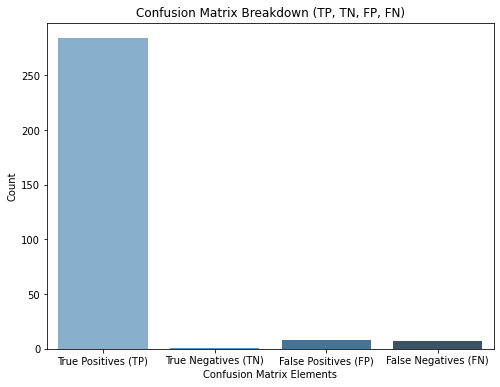

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have already trained the model and made predictions
# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Prepare the data for the bar plot
confusion_matrix_values = {
    'True Positives (TP)': tp,
    'True Negatives (TN)': tn,
    'False Positives (FP)': fp,
    'False Negatives (FN)': fn
}

# Plot the values in a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=list(confusion_matrix_values.keys()), y=list(confusion_matrix_values.values()), palette='Blues_d')
plt.title("Confusion Matrix Breakdown (TP, TN, FP, FN)")
plt.ylabel("Count")
plt.xlabel("Confusion Matrix Elements")
plt.show()

In [30]:
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix (assuming the model has already been trained and predictions made)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Data for the chart
labels = ['True Positives (TP)', 'True Negatives (TN)', 'False Positives (FP)', 'False Negatives (FN)']
values = [tp, tn, fp, fn]
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728']  # Fancy colors for each bar

# Create the bar chart
fig = go.Figure(data=[go.Bar(
    x=labels, 
    y=values, 
    marker_color=colors, 
    text=values, 
    textposition='auto',
    marker=dict(line=dict(color='black', width=1))  # Add black borders around the bars
)])

# Add title and axis labels
fig.update_layout(
    title="Confusion Matrix Breakdown: TP, TN, FP, FN",
    xaxis_title="Confusion Matrix Elements",
    yaxis_title="Count",
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background for a clean look
    font=dict(size=14)
)

# Show the interactive chart
fig.show()

In [31]:
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix (assuming the model has already been trained and predictions made)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0

# Data for the chart
labels = ['Accuracy', 'Precision', 'Recall']
values = [accuracy, precision, recall]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Different colors for each bar

# Create the bar chart
fig = go.Figure(data=[go.Bar(
    x=labels, 
    y=values, 
    marker_color=colors, 
    text=[f"{v:.2f}" for v in values],  # Format the values to 2 decimal places
    textposition='auto',
    marker=dict(line=dict(color='black', width=1))  # Add black borders around the bars
)])

# Add title and axis labels
fig.update_layout(
    title="Model Performance Metrics",
    xaxis_title="Metrics",
    yaxis_title="Values",
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background for a clean look
    font=dict(size=14)
)

# Show the interactive chart
fig.show()
